In [9]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Read cleaned csv file
df = pd.read_csv("../data_cleaning/OSMI_clean.csv")

In [11]:
#filter for only tech companies first
df = df[df["tech company"]=="1.0"]
#create two dataframes for plotting by narrowing down df to necessary columns
df_anonymity = df[["current mental health disorder","anonymity protected when using benefits"]]
df_leave = df[["current mental health disorder","ease of asking for leave"]]

In [12]:
#drop rows with missing data and remove rows with don't know responses
df_anonymity = df_anonymity.dropna()
df_leave = df_leave.dropna()
df_anonymity = df_anonymity[(df_anonymity["current mental health disorder"]!="Don't Know")]
df_leave = df_leave[(df_leave["current mental health disorder"]!="Don't Know")]


In [13]:
#Create 2 new dataframes with indexes as the columns of df_anonymity nd df_leave and the column as value counts
anonymity_groupby = df_anonymity.groupby("anonymity protected when using benefits")["current mental health disorder"].value_counts()
anonymity_groupby_df = pd.DataFrame(anonymity_groupby)
leave_groupby = df_leave.groupby("ease of asking for leave")["current mental health disorder"].value_counts()
leave_groupby_df = pd.DataFrame(leave_groupby)

In [14]:
#calculate percentages for each value in the group for disply
#code for calculating percentage of group
#https://stackoverflow.com/questions/75090908/pandas-matplotlib-bar-plot-with-multi-index-dataframe
anonymity_groupby_df["percent of group"] = (anonymity_groupby_df
                                            .groupby(by="anonymity protected when using benefits",group_keys=False)
                                            .apply(lambda anonymity_groupby_df: anonymity_groupby_df / anonymity_groupby_df.sum() * 100))

leave_groupby_df["percent of group"] = (leave_groupby_df
                                        .groupby(by="ease of asking for leave",group_keys=False)
                                        .apply(lambda leave_groupby_df: leave_groupby_df / leave_groupby_df.sum() * 100))

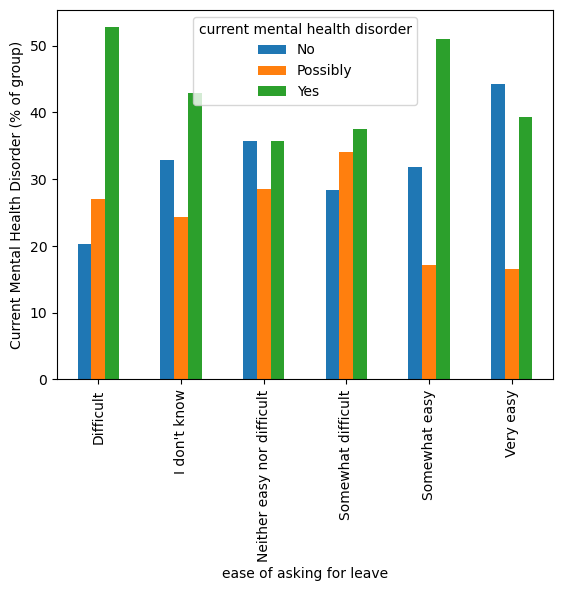

In [15]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave by percentage in group
leave_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (% of group)")
plt.savefig("ease_of_asking_leave_group_percent.png", bbox_inches='tight')


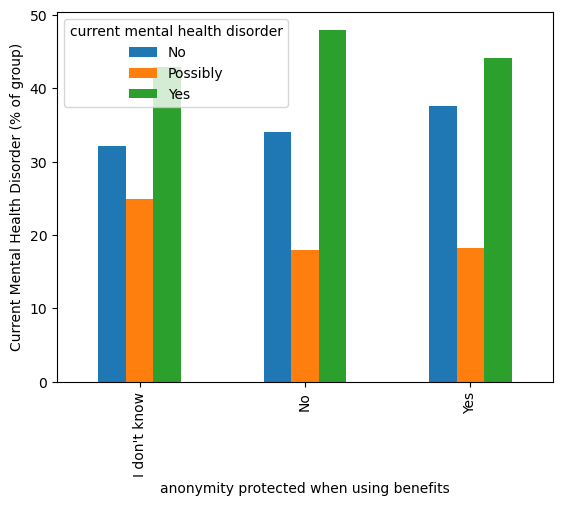

In [16]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for anonymity percentage in group
anonymity_groupby_df["percent of group"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (% of group)")
plt.savefig("anonymity_protected_bar_group_percent.png", bbox_inches='tight')

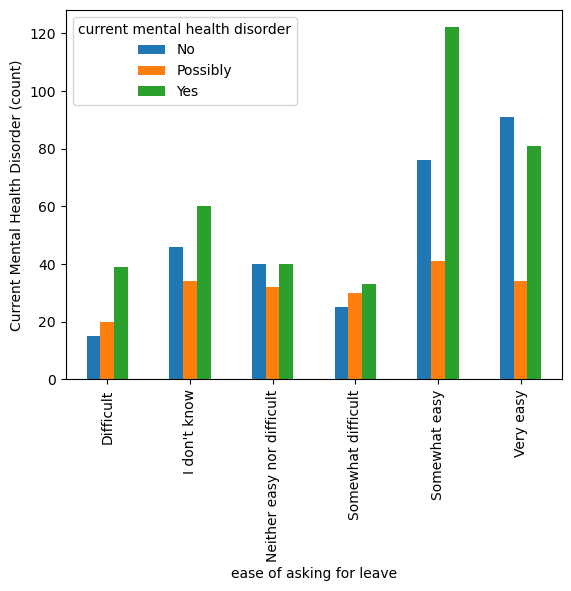

In [17]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for ease of asking for leave by count
leave_groupby_df["count"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (count)")
plt.savefig("ease_of_asking_leave_count.png", bbox_inches='tight')

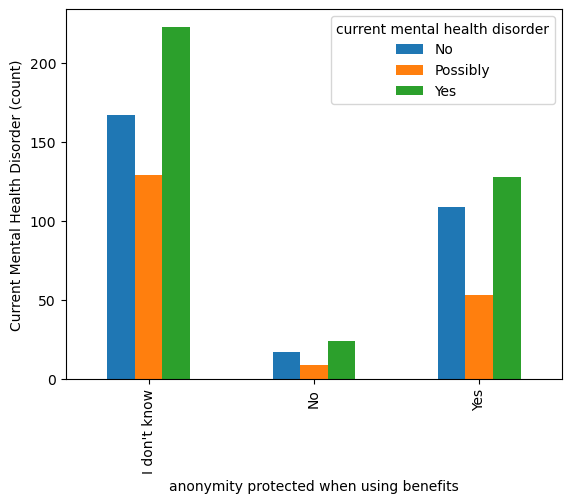

In [18]:
#multiindex bar chart formatting:
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

#code for cropping chart correctly
#https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142

#bar chart for anonymity by count
anonymity_groupby_df["count"].unstack().plot(kind='bar')
plt.ylabel("Current Mental Health Disorder (count)")
plt.savefig("anonymity_protected_bar_count.png", bbox_inches='tight')